# Omdena Local Chapter: Air Quality Prediciton for Mexico City

Name: Jen Patrick Nataba  
Phase: Data Collection and Cleaning  
Data: Traffic and Atmospheric Data Analysis for MER and UIZ Stations - 2024  
Sourced from: Air pollution and meteorological data from the official Mexico  
City Government site combined with traffic flow data from TomTom


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Let's start by reading the raw datasets
atm_met_uiz = pd.read_csv('/content/drive/MyDrive/Mexico_Air_QualityData/raw_ATM+MET_UIZ.csv')
atm_met_mer = pd.read_csv('/content/drive/MyDrive/Mexico_Air_QualityData/raw_ATM+MET_MER.csv')
traffic_uiz = pd.read_csv('/content/drive/MyDrive/Mexico_Air_QualityData/raw_traffic_UIZ.csv')
traffic_mer = pd.read_csv('/content/drive/MyDrive/Mexico_Air_QualityData/raw_traffic_MER.csv')

# I. The existing data set and its contents

## Let's take a look at the dataset and be familiarized with its contents before doing any data cleaning.

## 1. **raw_ATM_MET_UIZ.csv**  

This dataset contains air pollutant and meteorological data for the **UIZ station**, sourced from the **Mexico City Government**. It includes hourly data for various pollutants and meteorological parameters.

### Key Columns:
- **CO**: Concentration of **carbon monoxide**.
- **NO**: Concentration of **nitric oxide**.
- **NOX**: Concentration of **nitrogen oxides**.
- **NO2**: Concentration of **nitrogen dioxide**.
- **O3**: Concentration of **ozone**.
- **PM10**: Concentration of **particulate matter** (PM10).
- **PM25**: Concentration of **particulate matter** (PM2.5).
- **RH**: **Relative humidity**.
- **SO2**: Concentration of **sulfur dioxide**.
- **TMP**: **Temperature**.
- **WDR**: **Wind direction**.
- **WSP**: **Wind speed**.
- **date**: **Date and hour** for each data recording.


In [ ]:
# Take a peek on the atmospheric data gathered from the UIZ station
atm_met_uiz.head()


,date,CO,NO,NOX,NO2,O3,PM10,PM25,RH,SO2,TMP,WDR,WSP
0,23/02/2024 01:00,2.14,50.0,123.0,74.0,2.0,67.0,31.0,31.0,7.0,16.0,103.0,1.1
1,23/02/2024 02:00,2.20,68.0,138.0,70.0,2.0,66.0,31.0,34.0,7.0,15.0,53.0,0.9
2,23/02/2024 03:00,1.90,52.0,112.0,61.0,2.0,64.0,32.0,38.0,6.0,14.0,122.0,1.1
3,23/02/2024 04:00,1.29,12.0,69.0,57.0,5.0,65.0,32.0,41.0,5.0,13.0,134.0,1.0
4,23/02/2024 05:00,0.97,5.0,55.0,50.0,9.0,63.0,33.0,41.0,5.0,12.0,31.0,0.8


In [ ]:
# Let's make sure the data types are appropriate
atm_met_uiz.dtypes

,0
date,object
CO,float64
NO,float64
NOX,float64
NO2,float64
O3,float64
PM10,float64
PM25,float64
RH,float64
SO2,float64


## 2. **raw_ATM_MET_MER.csv**  

Similar to the **UIZ dataset**, this file provides air pollutant and meteorological data for the **MER station**, sourced from the **Mexico City Government**. It includes hourly pollutant levels and meteorological readings.

### Key Columns:
Same as **raw_ATM_MET_UIZ.csv**, covering:
- Concentrations of **CO**, **NO**, **NO2**, **PM10**, and **PM25**.
- Meteorological readings for **temperature**, **humidity**, **wind direction**, **wind speed**, and other related elements.


In [ ]:
# Now let's check the atmospheric data gathered from the MER station

atm_met_mer.head()

,date,CO,NO,NOX,NO2,O3,PM10,PM25,RH,SO2,TMP,WDR,WSP
0,23/02/2024 01:00,2.85,130.0,207.0,76.0,3.0,82.0,44.0,26.0,7.0,18.0,42.0,0.8
1,23/02/2024 02:00,1.87,94.0,166.0,71.0,2.0,70.0,39.0,27.0,7.0,17.0,18.0,0.8
2,23/02/2024 03:00,1.24,45.0,111.0,66.0,2.0,60.0,33.0,28.0,4.0,16.0,357.0,NaN
3,23/02/2024 04:00,1.62,69.0,135.0,66.0,2.0,40.0,19.0,33.0,3.0,15.0,181.0,0.7
4,23/02/2024 05:00,1.73,64.0,128.0,64.0,2.0,58.0,30.0,40.0,2.0,14.0,189.0,0.6


In [ ]:
# Check if the data types are appropriate

atm_met_mer.dtypes

,0
date,object
CO,float64
NO,float64
NOX,float64
NO2,float64
O3,float64
PM10,float64
PM25,float64
RH,float64
SO2,float64


## 3. **raw_traffic_UIZ.csv**

This dataset contains traffic data for the **UIZ area**, providing spatial and temporal details about traffic conditions, including road information, congestion levels, and location-specific data.

### Key Columns:
- **type**: Describes the data format or shape of the traffic data (e.g., `"LINESTRING"`).
- **road_type**: Type of the road (though this column has missing data in the sample).
- **traffic_level**: Numerical representation of traffic density or congestion.
- **traffic_road_coverage**: Indicates the extent of road coverage (e.g., `"full"`).
- **road_closure**: Indicates whether a road is closed (though data is missing in the sample).
- **road_category**: Classifies roads, such as `"tertiary"`.
- **road_subcategory**: Further classification of roads, such as `"major_local"`.
- **left_hand_traffic**: Indicates whether the road supports left-hand traffic (mostly missing in the sample).
- **coordinates**: Geographical coordinates marking the location, likely showing a path or route.
- **date**: Date of the data recording.
- **time**: Time of the data recording.
- **station**: Identifier for the station, here it is `"UIZ"`.
- **streetID**: Unique identifier for each street in the data.


In [ ]:
# An overview of the traffic data from UIZ station
traffic_uiz.head()

,type,road_type,traffic_level,traffic_road_coverage,road_closure,road_category,road_subcategory,left_hand_traffic,coordinates,date,time,station,streetID
0,LINESTRING,NaN,0.794,full,NaN,tertiary,major_local,NaN,"[[19.360893502453113, -99.07470703125], [19.36...",23/02/2024,14:27:02,UIZ,25403
1,LINESTRING,NaN,0.864,full,NaN,tertiary,major_local,NaN,"[[19.360893502453113, -99.07470703125], [19.36...",23/02/2024,14:48:21,UIZ,25403
2,LINESTRING,NaN,1.000,full,NaN,tertiary,major_local,NaN,"[[19.360893502453113, -99.07470703125], [19.36...",23/02/2024,14:05:37,UIZ,25403
3,LINESTRING,NaN,1.000,full,NaN,tertiary,major_local,NaN,"[[19.360893502453113, -99.07470703125], [19.36...",23/02/2024,14:05:37,UIZ,25403
4,LINESTRING,NaN,1.000,full,NaN,tertiary,major_local,NaN,"[[19.360893502453113, -99.07470703125], [19.36...",23/02/2024,15:29:01,UIZ,25403


In [ ]:
# Let's see what data types need to be cleaned for later

traffic_uiz.dtypes

,0
type,object
road_type,float64
traffic_level,float64
traffic_road_coverage,object
road_closure,float64
road_category,object
road_subcategory,object
left_hand_traffic,float64
coordinates,object
date,object


## 4. **raw_traffic_MER.csv**

This dataset provides traffic data for the **MER station**, with fields similar to those in the **UIZ traffic dataset**. It captures spatial and temporal traffic information, including road coverage, congestion levels, and road-specific details.

### Key Columns:
- **type**: Describes the data format or geometry type (e.g., `"LINESTRING"`).
- **road_type**: Contains road type data, though it has missing values in this sample.
- **traffic_level**: A numerical value representing traffic congestion or density.
- **traffic_road_coverage**: Specifies the extent of road coverage by traffic (e.g., `"full"`).
- **road_closure**: Indicates if there are road closures, though this data is missing in this sample.
- **road_category**: Classifies the type of road, with values such as `"primary"`.
- **road_subcategory**: Further categorization of the road type, though this data is missing in the sample.
- **left_hand_traffic**: Indicates if left-hand traffic is in use (mostly missing in the sample).
- **coordinates**: Stores geographical coordinates representing the path or area of coverage.
- **date**: Date of the recorded traffic data.
- **time**: Time of the recorded traffic data.
- **station**: Identifies the station associated with the data, here it is `"MER"`.


In [ ]:
# Let's take a peek at the traffic dataset from MER
traffic_mer.head()

,type,road_type,traffic_level,traffic_road_coverage,road_closure,road_category,road_subcategory,left_hand_traffic,coordinates,date,time,station
0,LINESTRING,NaN,0.559,full,NaN,primary,NaN,NaN,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,10:35:26,MER
1,LINESTRING,NaN,0.409,full,NaN,primary,NaN,NaN,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,10:04:30,MER
2,LINESTRING,NaN,0.105,full,NaN,primary,NaN,NaN,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,11:34:55,MER
3,LINESTRING,NaN,0.532,full,NaN,primary,NaN,NaN,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,11:48:24,MER
4,LINESTRING,NaN,0.527,full,NaN,primary,NaN,NaN,"[[19.424477059181264, -99.12001624703407], [19...",04/03/2024,11:05:11,MER


In [ ]:
# What are its data types?

traffic_mer.dtypes

,0
type,object
road_type,float64
traffic_level,float64
traffic_road_coverage,object
road_closure,float64
road_category,object
road_subcategory,float64
left_hand_traffic,float64
coordinates,object
date,object


# II. Data Cleaning/Data Wrangling

With the overview out of the way, let's start cleaning the dataset

In [ ]:
# Missing atm data for UIZ station

print(atm_met_uiz.shape)

met_uiz_missing = atm_met_uiz.isna().sum()

total_missing_uiz = met_uiz_missing.sum()

print(met_uiz_missing)
print("Total missing values (UIZ station):", total_missing_uiz)



(2307, 13)
date      0
CO      273
NO      184
NOX     183
NO2     198
O3      179
PM10     32
PM25     38
RH       62
SO2      98
TMP      66
WDR      96
WSP     259
dtype: int64
Total missing values (UIZ station): 1668


In [ ]:
# Missing data for MER station

print(atm_met_mer.shape)

met_mer_missing = atm_met_mer.isna().sum()

total_missing_mer = met_mer_missing.sum()

print(met_mer_missing)
print("Total missing values (MER station):", total_missing_mer)



(2231, 13)
date      0
CO      438
NO      446
NOX     446
NO2     448
O3       83
PM10    377
PM25    386
RH        1
SO2     448
TMP       1
WDR      21
WSP      87
dtype: int64
Total missing values (MER station): 3182


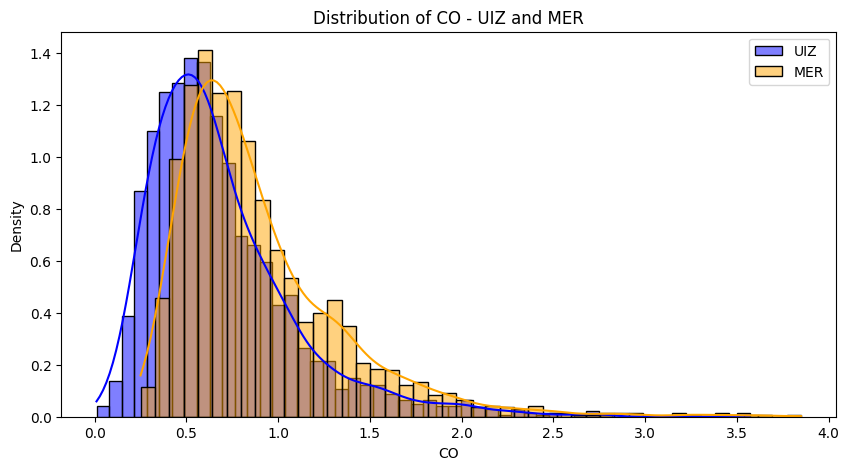

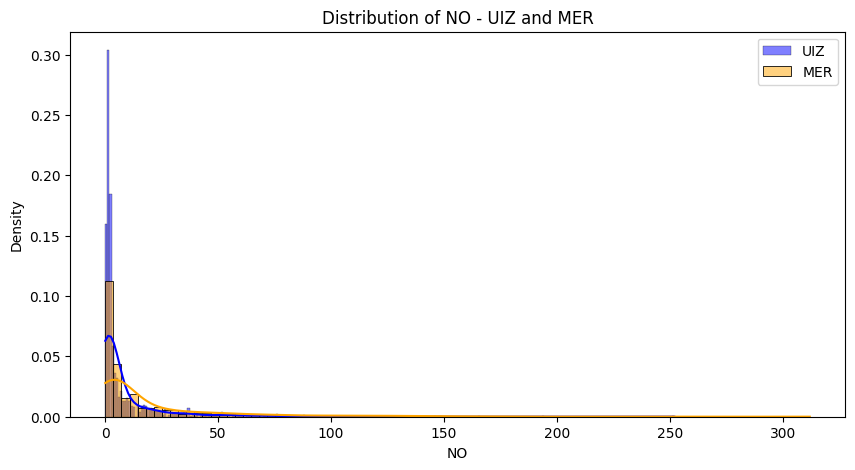

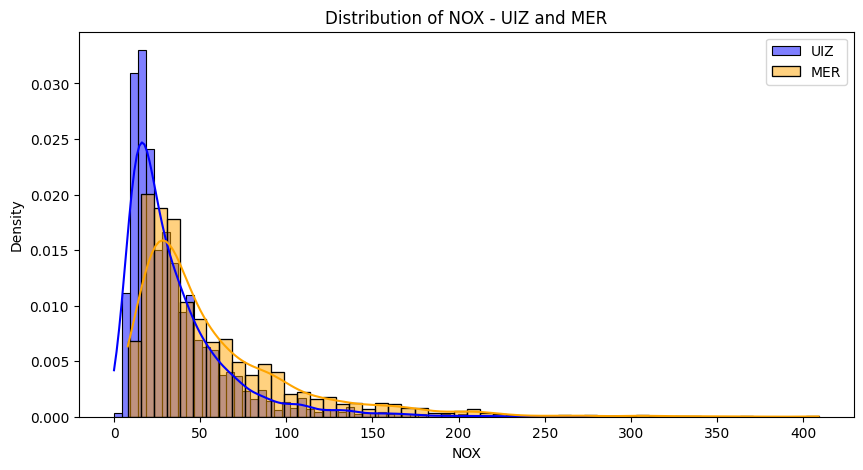

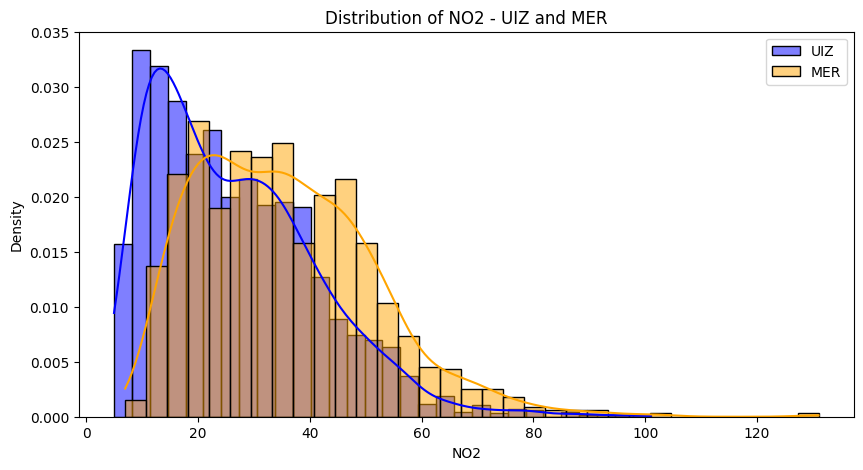

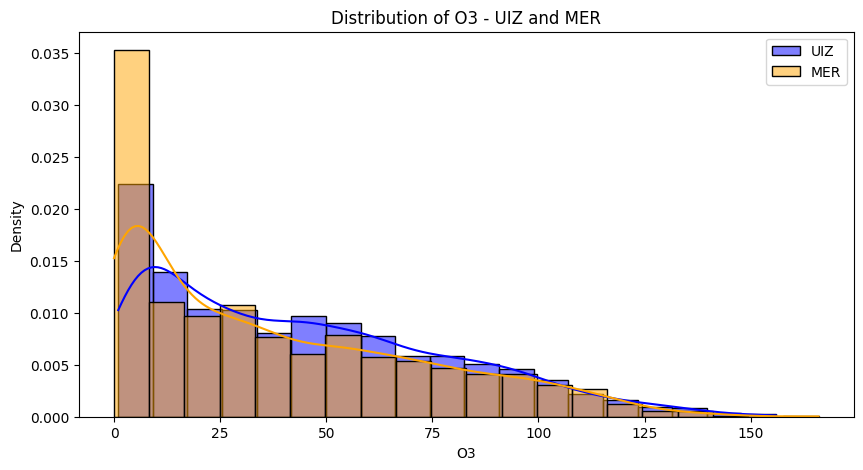

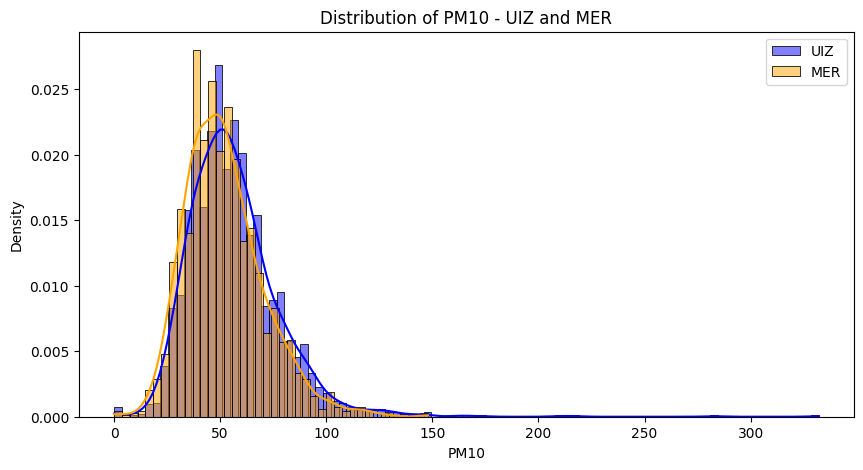

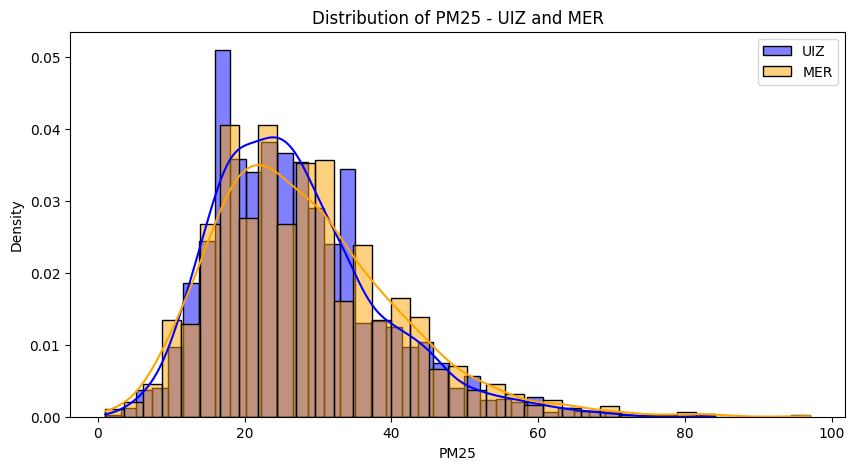

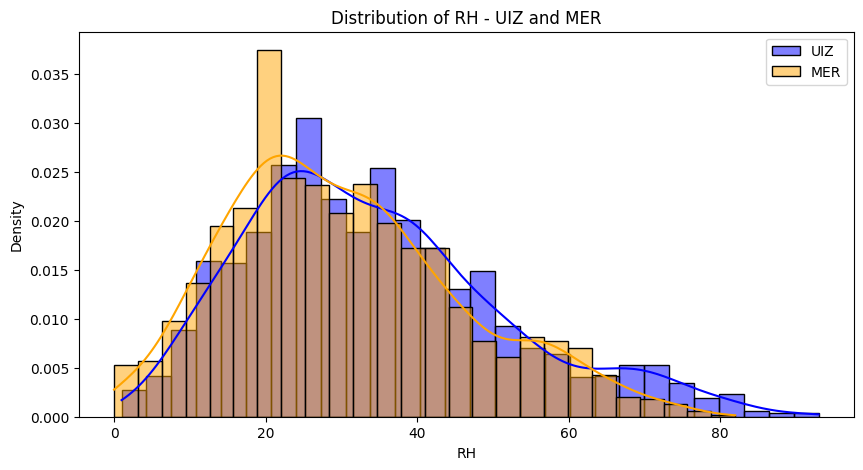

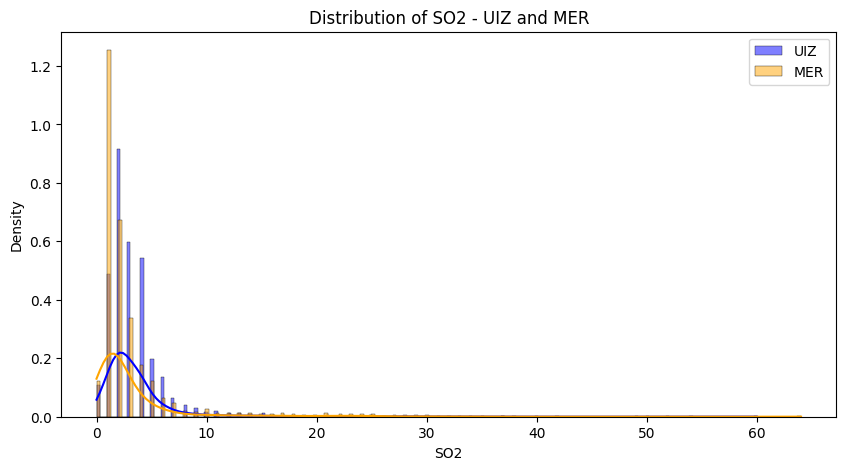

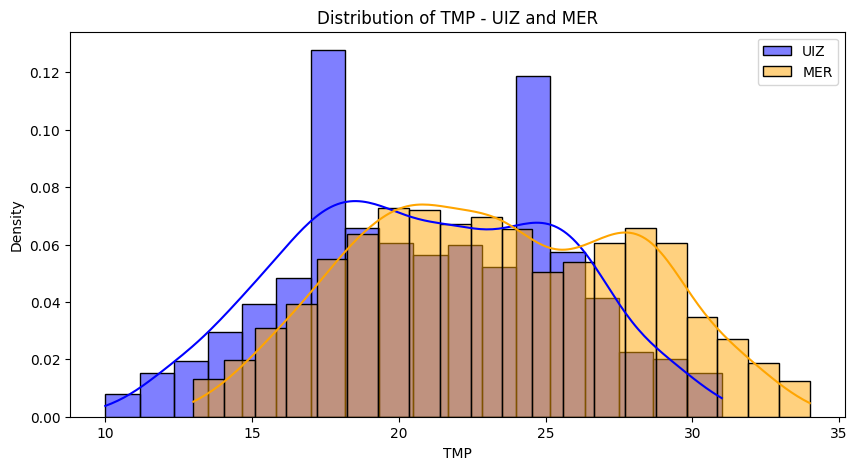

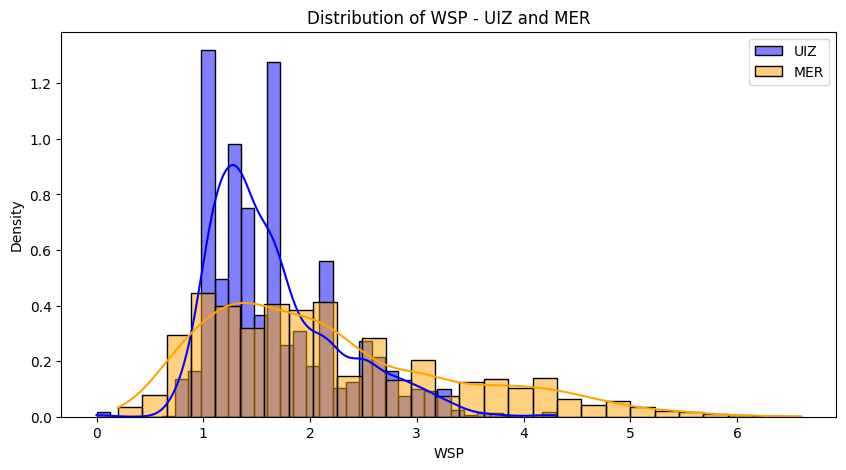

{'CO': {'UIZ Skewness': 1.844143828929645, 'MER Skewness': 1.9243558803217784},
 'NO': {'UIZ Skewness': 4.453331142205857, 'MER Skewness': 3.1292819522647024},
 'NOX': {'UIZ Skewness': 2.4311524554706714,
  'MER Skewness': 2.254379185979261},
 'NO2': {'UIZ Skewness': 0.9740678763756363,
  'MER Skewness': 0.915009590367148},
 'O3': {'UIZ Skewness': 0.6818323643122293,
  'MER Skewness': 0.8213585211589968},
 'PM10': {'UIZ Skewness': 2.368871336475806,
  'MER Skewness': 0.8667126170110238},
 'PM25': {'UIZ Skewness': 0.8968876396930713,
  'MER Skewness': 0.963099043119832},
 'RH': {'UIZ Skewness': 0.7045622632778448,
  'MER Skewness': 0.5514185407376258},
 'SO2': {'UIZ Skewness': 5.55075519588655, 'MER Skewness': 4.612922742052968},
 'TMP': {'UIZ Skewness': -0.013144888498861486,
  'MER Skewness': 0.057232443014333716},
 'WSP': {'UIZ Skewness': 1.0650169358656196,
  'MER Skewness': 0.8827773776773222}}

In [ ]:
# We have 1668 missing data from the atmospheric data gathered from the UIZ station
# We need to fill these missing values

# Let's decide what appropriate imputation method to use
columns_to_analyze = ['CO', 'NO', 'NOX', 'NO2', 'O3', 'PM10', 'PM25', 'RH', 'SO2', 'TMP', 'WSP']

# Initialize dictionary to store skewness information for mean/median decision
skewness_info = {}

# Analyze the distribution and skewness of each column to decide on mean or median
for col in columns_to_analyze:
    # Calculate skewness to see if the data is skewed (high skewness suggests median may be better)
    skewness_uiz = atm_met_uiz[col].dropna().skew()
    skewness_mer = atm_met_mer[col].dropna().skew()
    skewness_info[col] = {'UIZ Skewness': skewness_uiz, 'MER Skewness': skewness_mer}

    # Plot distribution for both UIZ and MER data for each column
    plt.figure(figsize=(10, 5))
    sns.histplot(atm_met_uiz[col], kde=True, color="blue", label="UIZ", stat="density")
    sns.histplot(atm_met_mer[col], kde=True, color="orange", label="MER", stat="density")
    plt.title(f'Distribution of {col} - UIZ and MER')
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

# Display skewness information for decision-making
skewness_info

### Identifying Outliers with Box Plots

In this section, we use box plots to visualize the distribution of the air quality datasets (`atm_met_uiz` and `atm_met_mer`) and identify potential outliers. This visualization helps us understand the spread of the data and decide which variables contain extreme values that may need to be handled appropriately in the analysis.


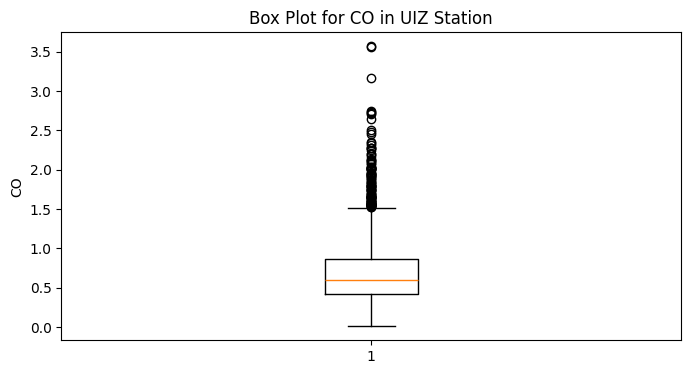

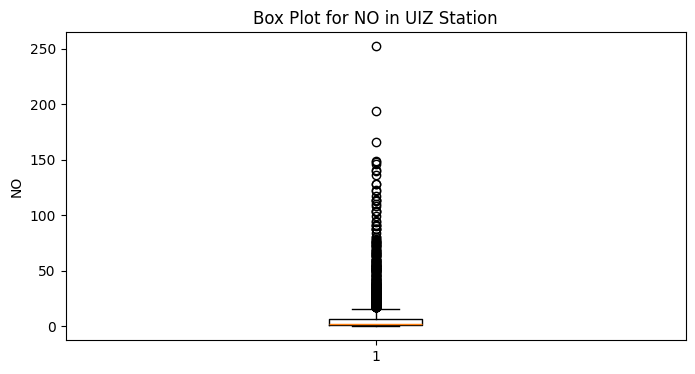

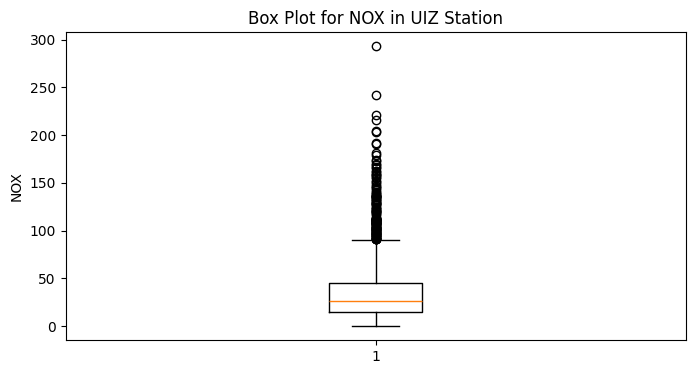

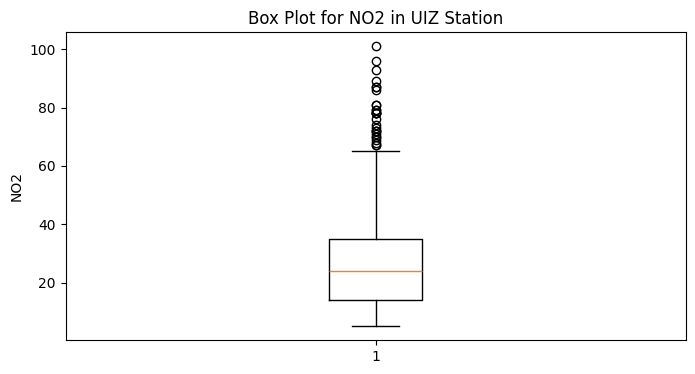

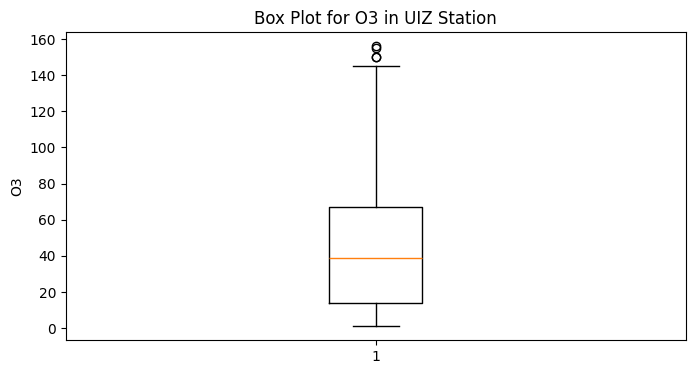

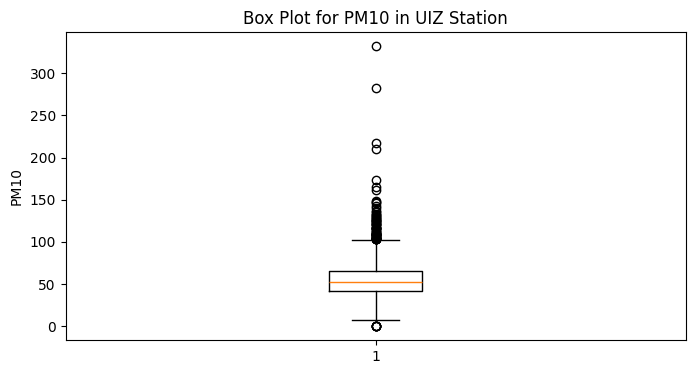

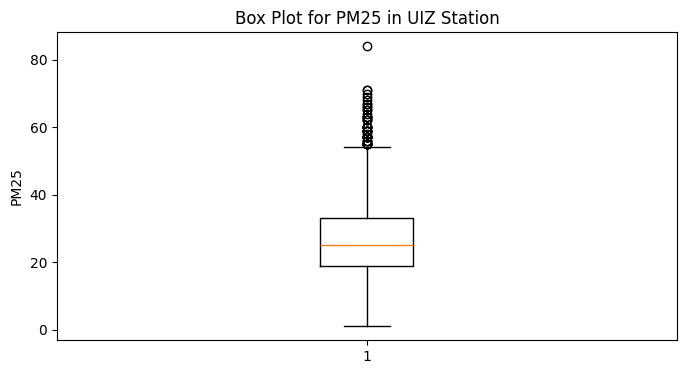

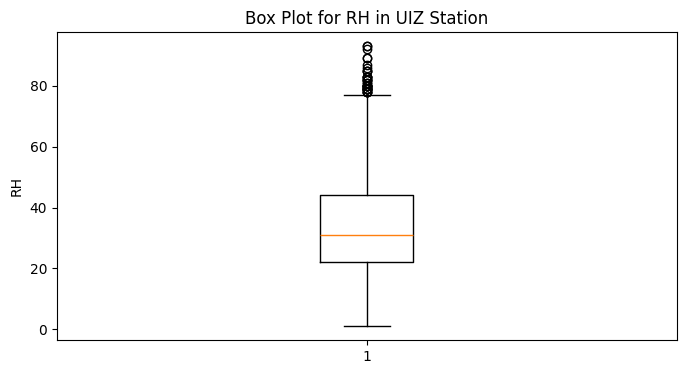

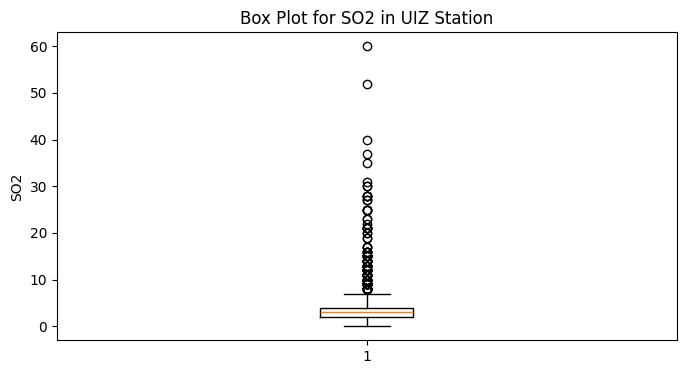

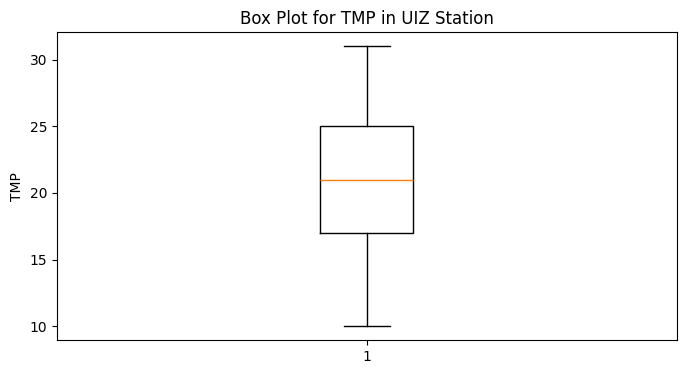

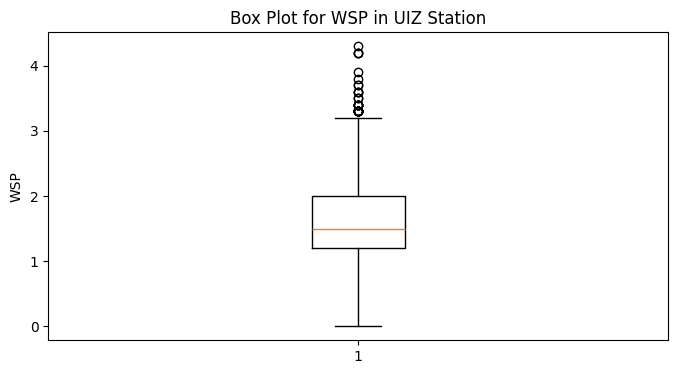

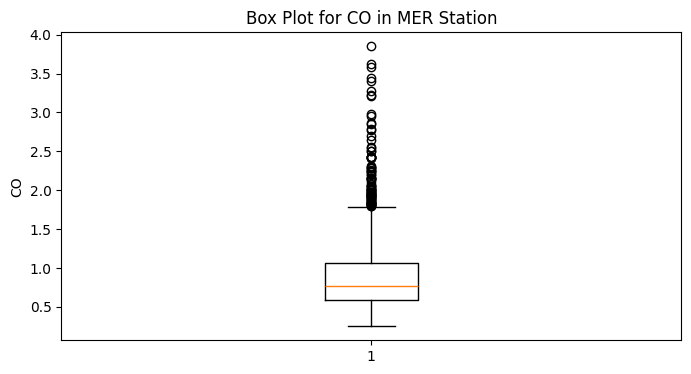

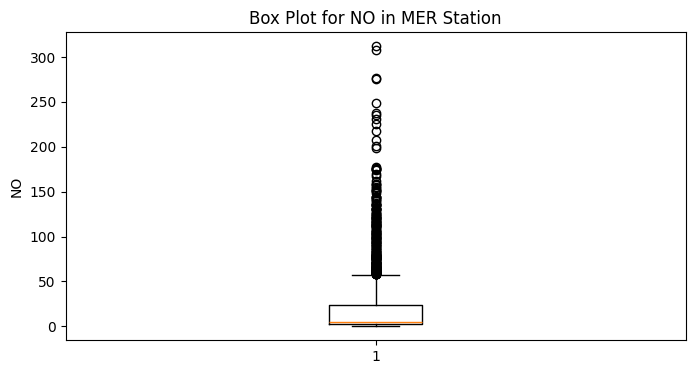

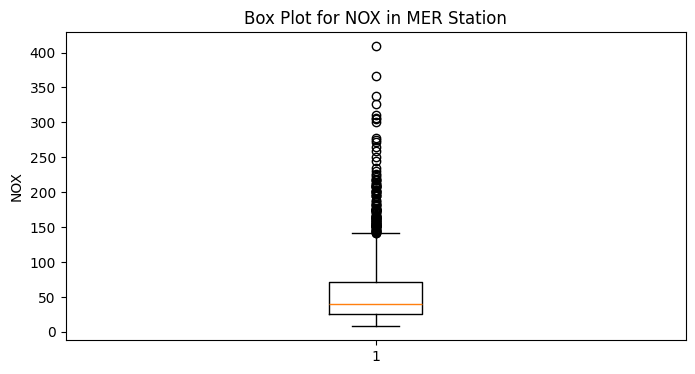

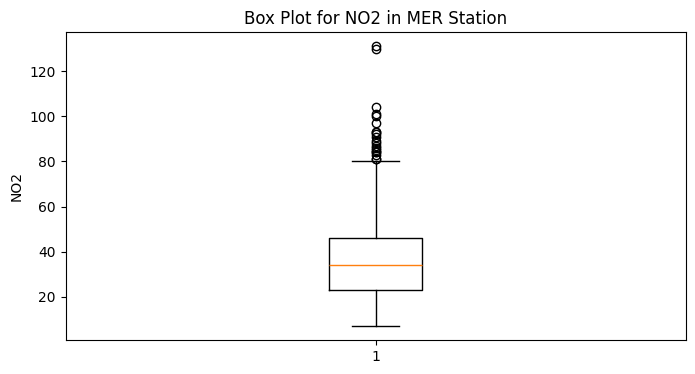

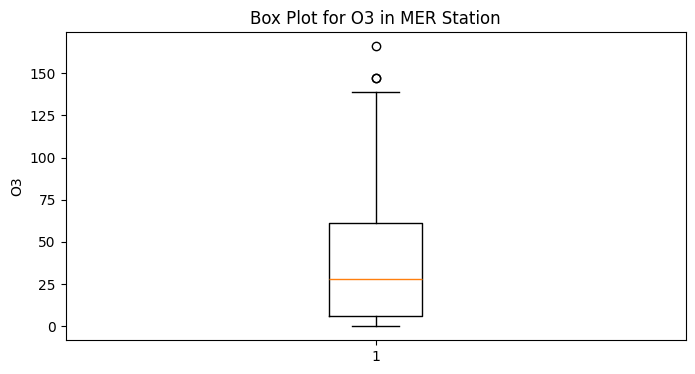

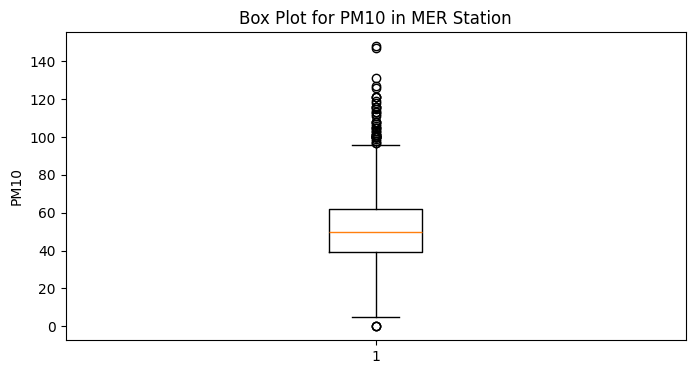

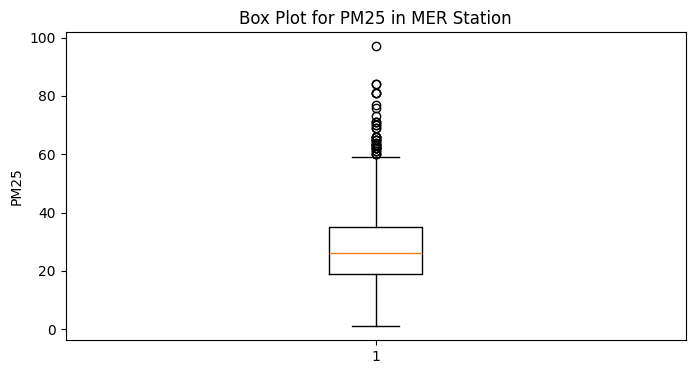

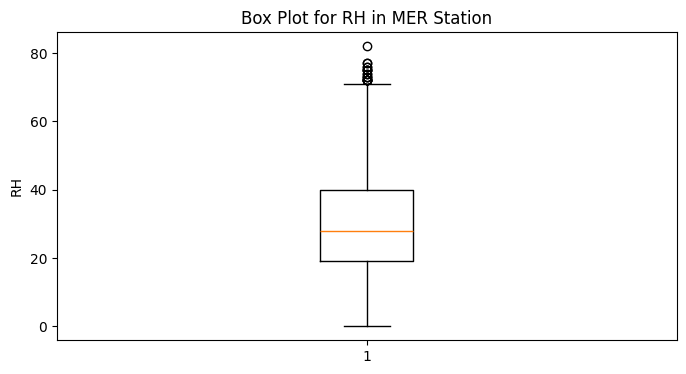

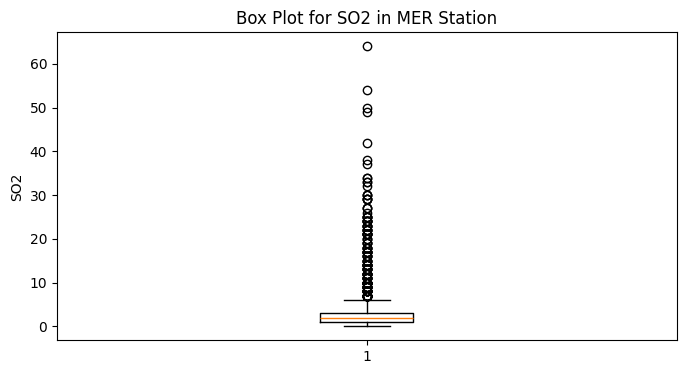

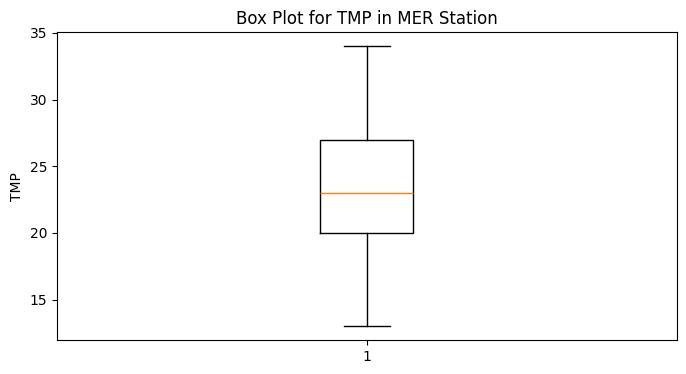

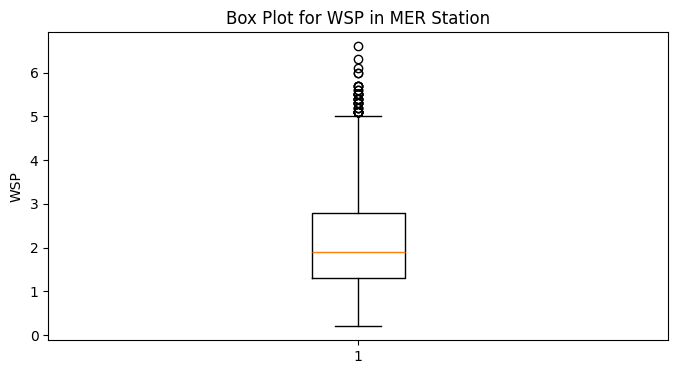

In [ ]:
# Box plot visualization for atm_met_uiz
for col in columns_to_analyze:
    if col in atm_met_uiz.columns:  # Check if the column exists in the dataframe
        plt.figure(figsize=(8,4))
        plt.title(f'Box Plot for {col} in UIZ Station')
        plt.boxplot(atm_met_uiz[col].dropna())  # Drop NA to avoid issues in box plot
        plt.ylabel(col)  # Add y-axis label for clarity
        plt.show()

# Box plot visualization for atm_met_mer
for col in columns_to_analyze:
    if col in atm_met_mer.columns:  # Check if the column exists in the dataframe
        plt.figure(figsize=(8,4))
        plt.title(f'Box Plot for {col} in MER Station')
        plt.boxplot(atm_met_mer[col].dropna())
        plt.ylabel(col)  # Add y-axis label for clarity
        plt.show()

As shown in the box plots, there are outliers in the dataset for both the MER and UIZ stations. We can lessen the outliers by performing the IQR Method below:

In [ ]:
# Remove outliers from the UIZ station dataset
for col in columns_to_analyze:
    if col in atm_met_uiz.columns:  # Check if the column exists in the dataframe
        Q1 = atm_met_uiz[col].quantile(0.25)
        Q3 = atm_met_uiz[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out outliers and update the dataframe
        atm_met_uiz = atm_met_uiz[(atm_met_uiz[col] >= lower_bound) & (atm_met_uiz[col] <= upper_bound)]

# Remove outliers from the MER station dataset
for col in columns_to_analyze:
    if col in atm_met_mer.columns:  # Check if the column exists in the dataframe
        Q1 = atm_met_mer[col].quantile(0.25)
        Q3 = atm_met_mer[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out outliers and update the dataframe
        atm_met_mer = atm_met_mer[(atm_met_mer[col] >= lower_bound) & (atm_met_mer[col] <= upper_bound)]

After applying the IQR method to remove outliers, let's visualize the dataset again with a boxplot to confirm the impact of the removal. While some outliers may have been removed, heavily skewed data could still result in remaining outliers, as the IQR method might not be sufficient for all cases.

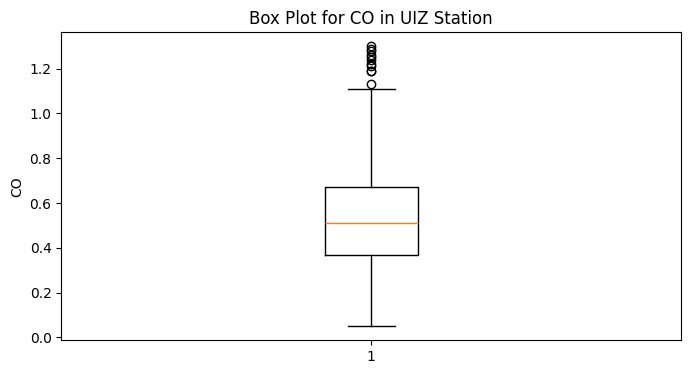

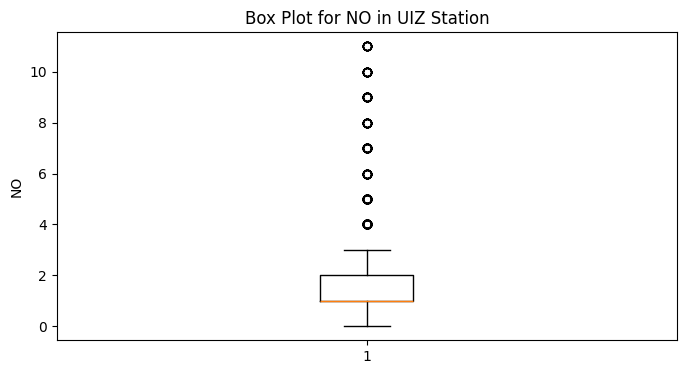

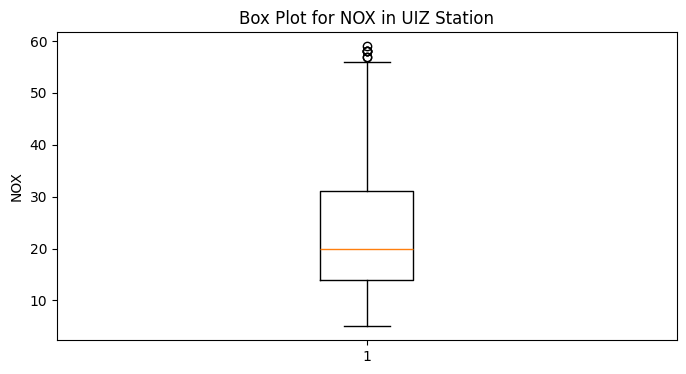

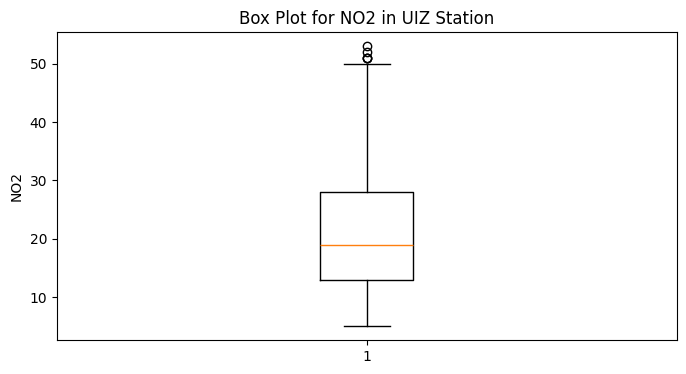

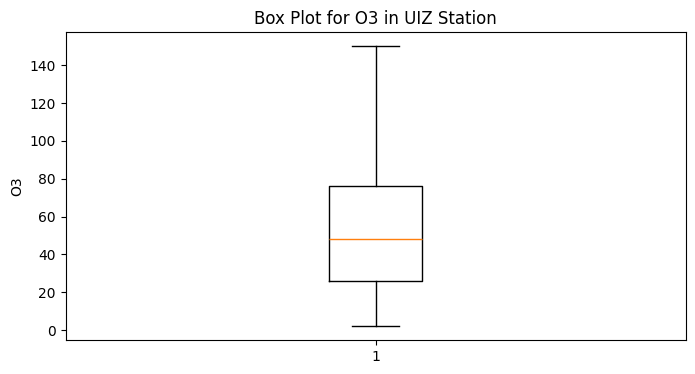

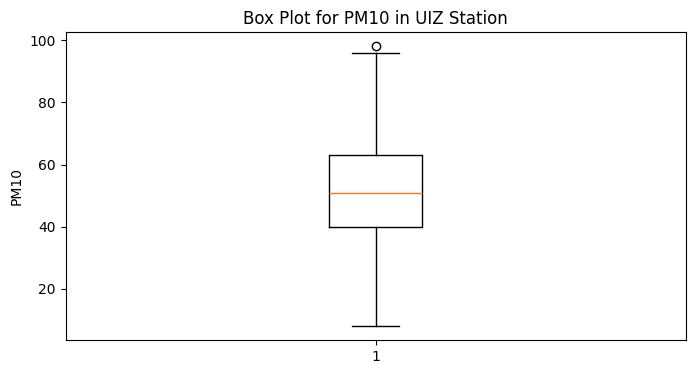

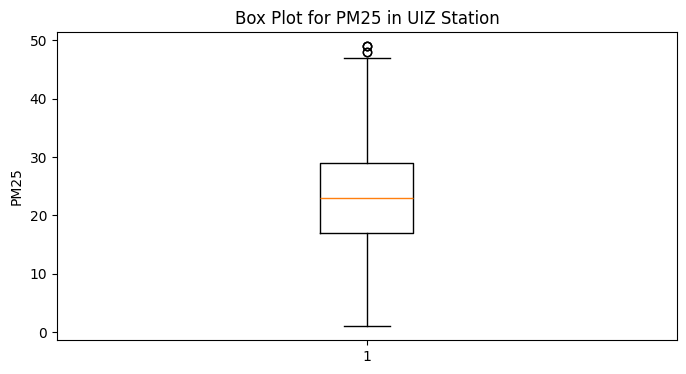

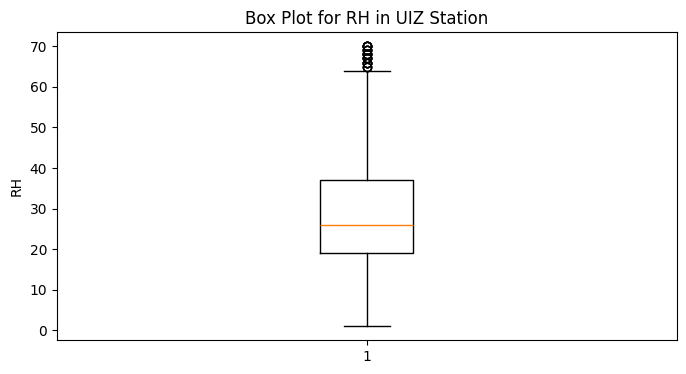

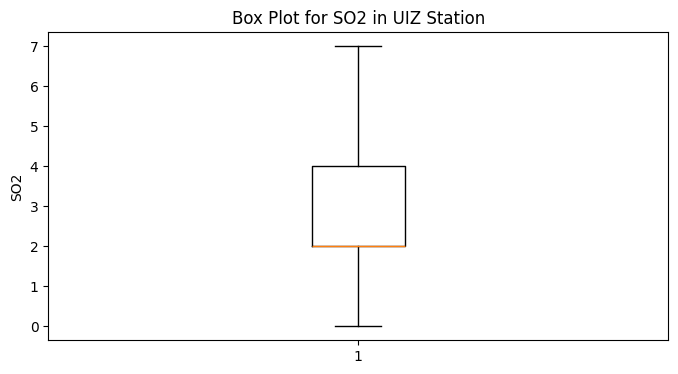

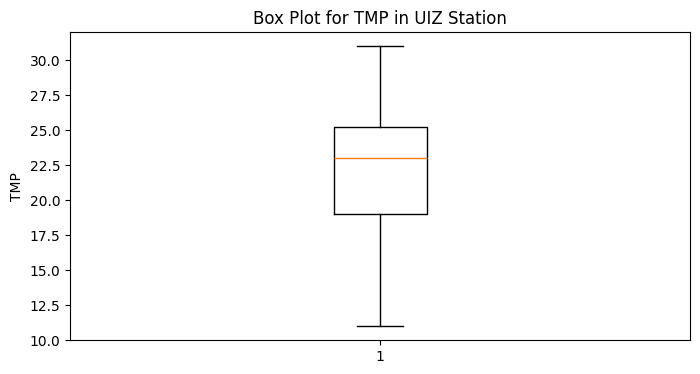

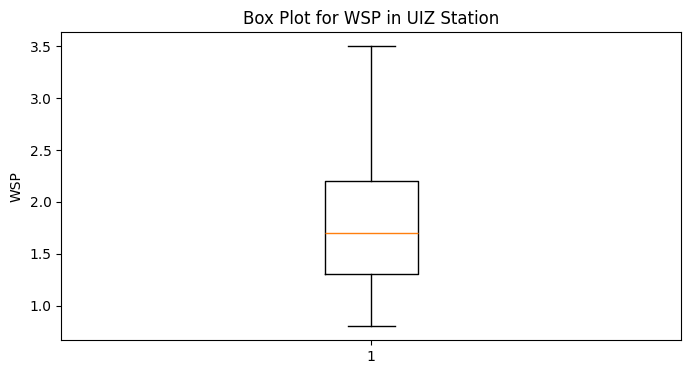

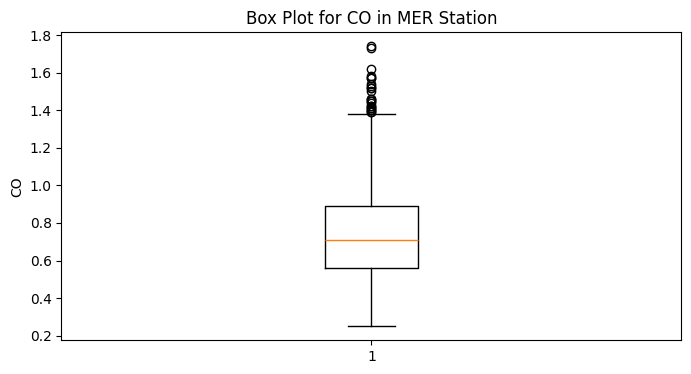

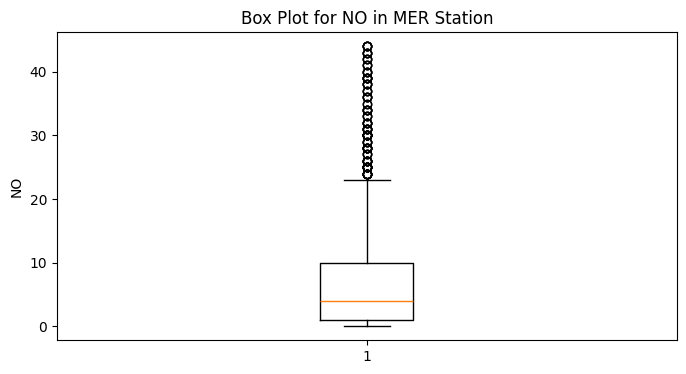

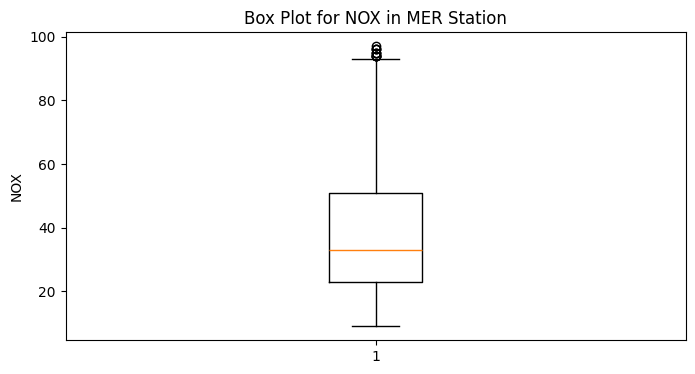

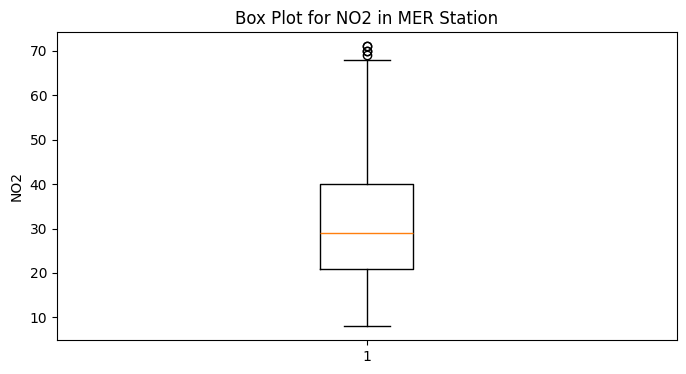

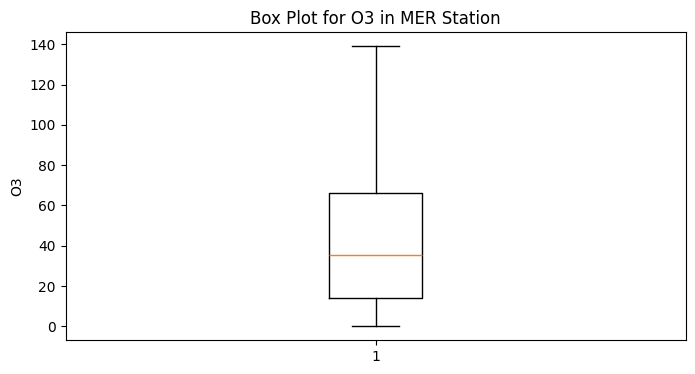

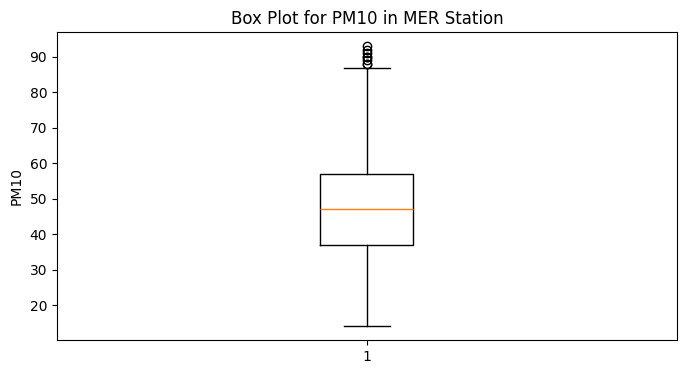

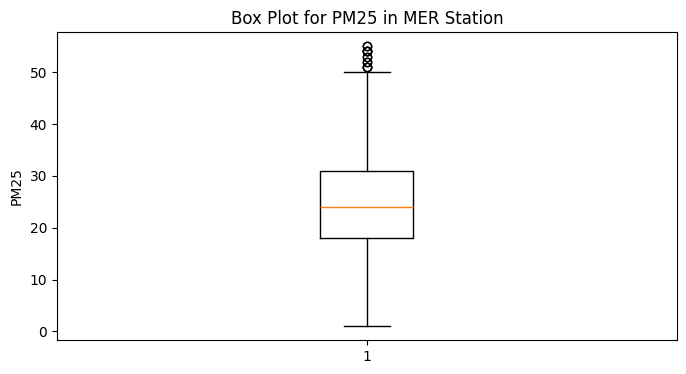

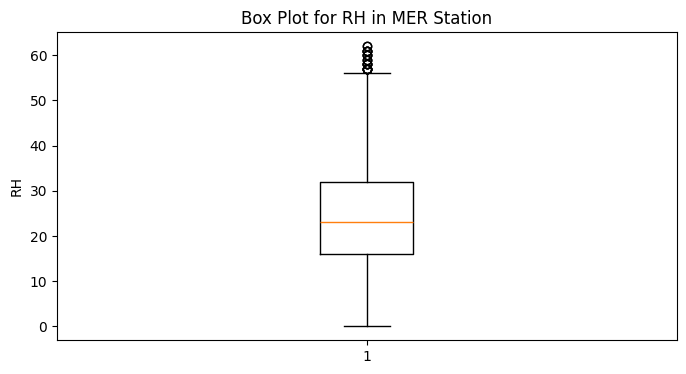

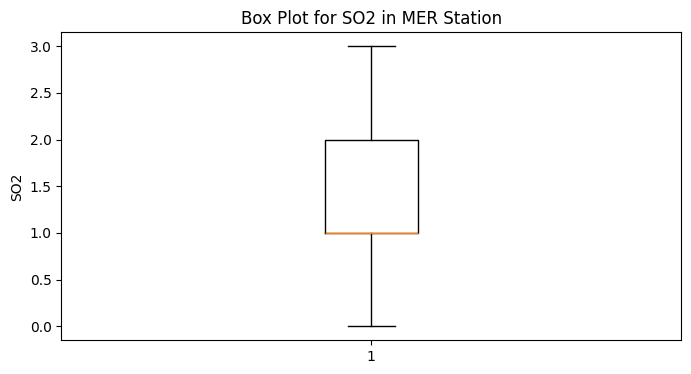

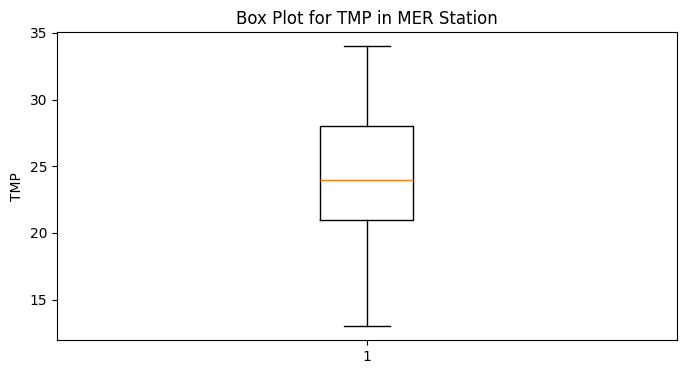

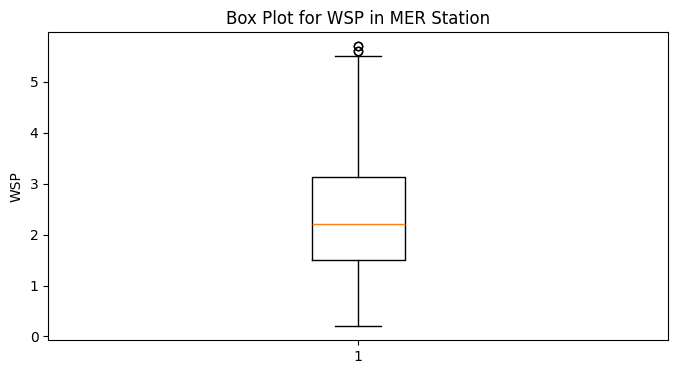

In [ ]:
# Box plot visualization for atm_met_uiz
for col in columns_to_analyze:
    if col in atm_met_uiz.columns:  # Check if the column exists in the dataframe
        plt.figure(figsize=(8,4))
        plt.title(f'Box Plot for {col} in UIZ Station')
        plt.boxplot(atm_met_uiz[col].dropna())
        plt.ylabel(col)  # Add y-axis label for clarity
        plt.show()

# Box plot visualization for atm_met_mer
for col in columns_to_analyze:
    if col in atm_met_mer.columns:  # Check if the column exists in the dataframe
        plt.figure(figsize=(8,4))
        plt.title(f'Box Plot for {col} in MER Station')
        plt.boxplot(atm_met_mer[col].dropna())
        plt.ylabel(col)  # Add y-axis label for clarity
        plt.show()


In the updated box plot, the extreme values have been reduced, but some outliers may still persist, especially in heavily skewed distributions. Let's visualize the skewness below to see if there are any changes.

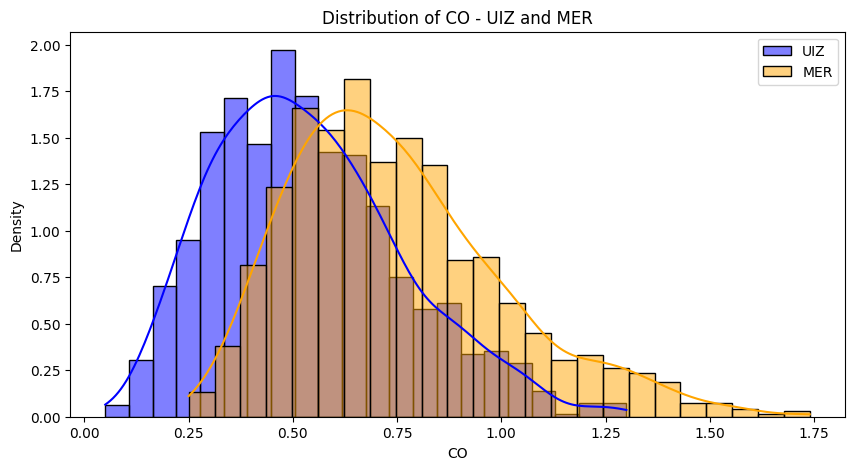

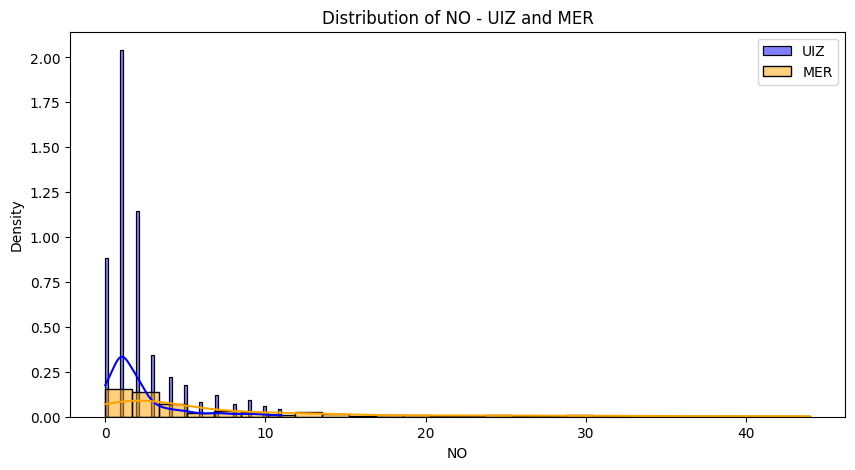

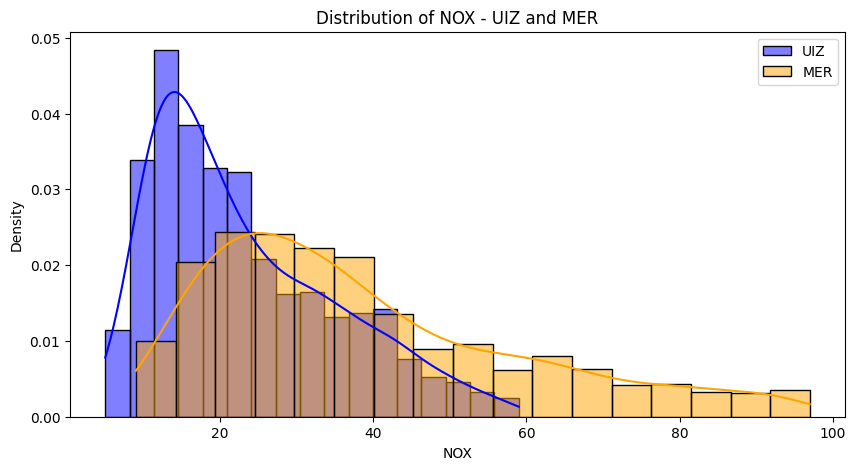

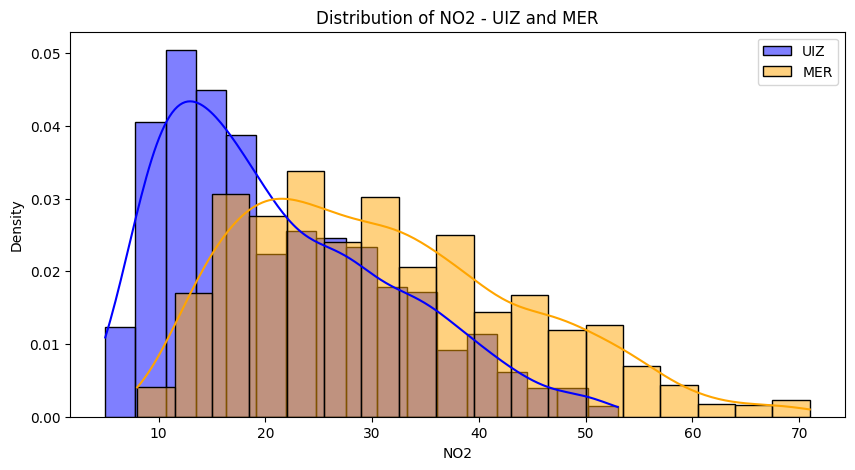

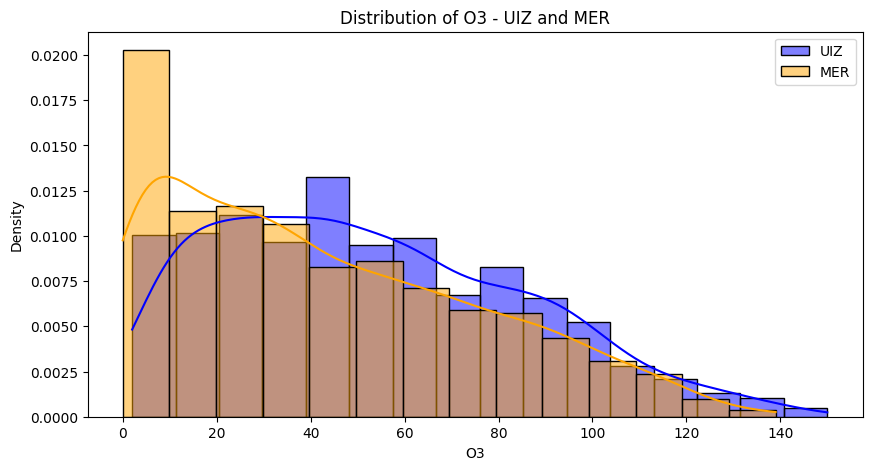

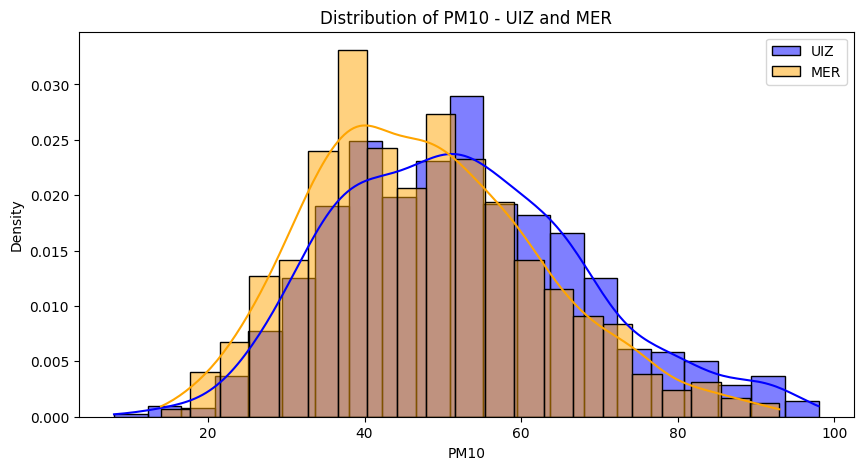

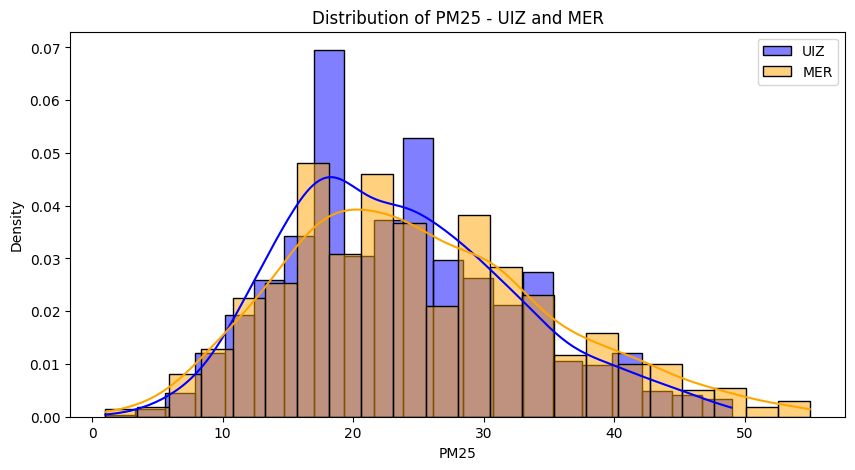

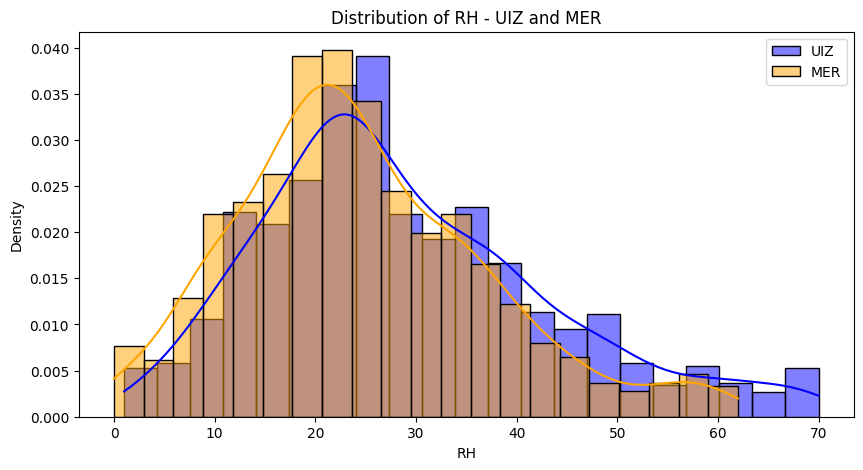

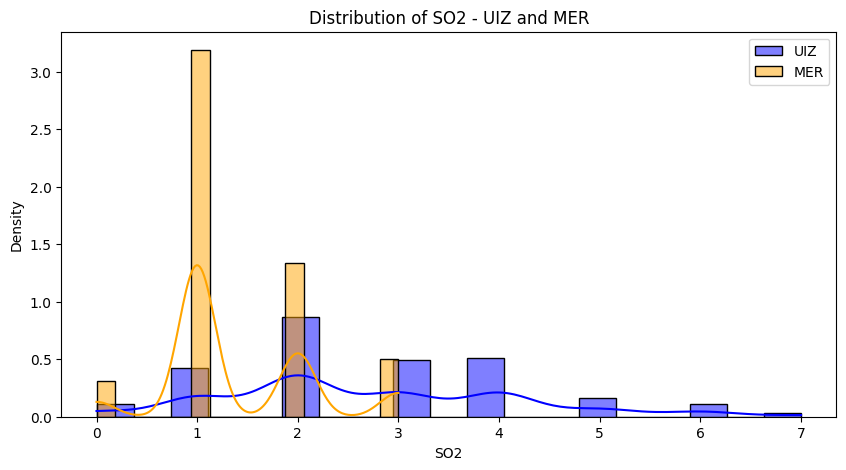

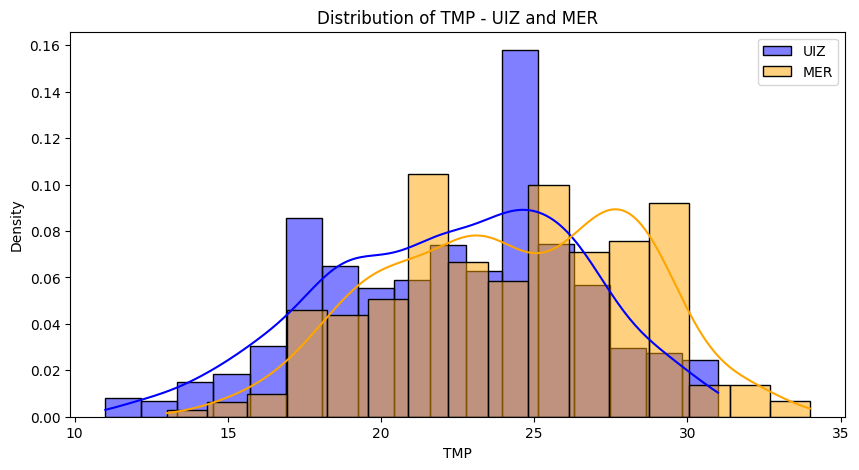

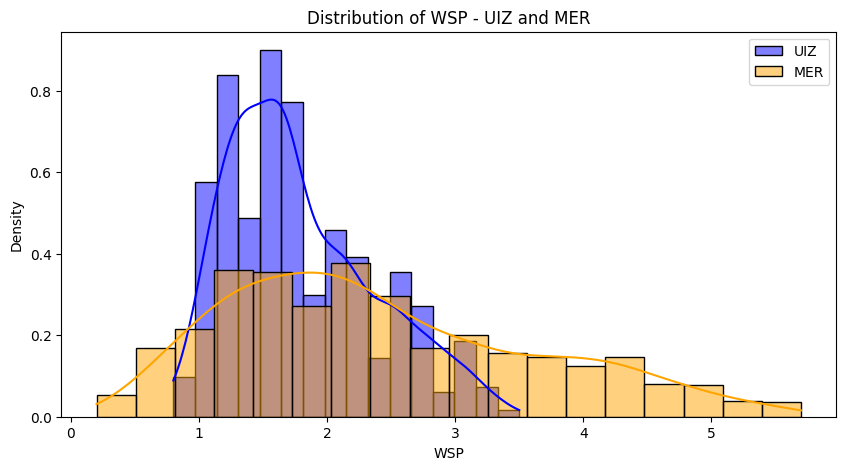

{'CO': {'UIZ Skewness': 0.5749812375161177,
  'MER Skewness': 0.8091741680064218},
 'NO': {'UIZ Skewness': 1.993165531280636, 'MER Skewness': 1.8803701539565478},
 'NOX': {'UIZ Skewness': 0.8408890082422832,
  'MER Skewness': 0.9328930945602127},
 'NO2': {'UIZ Skewness': 0.7316832148101304,
  'MER Skewness': 0.586060599418741},
 'O3': {'UIZ Skewness': 0.48908615702053454,
  'MER Skewness': 0.6132588804896125},
 'PM10': {'UIZ Skewness': 0.36867918295769325,
  'MER Skewness': 0.43899722487467313},
 'PM25': {'UIZ Skewness': 0.4698403901868716,
  'MER Skewness': 0.4729585340797603},
 'RH': {'UIZ Skewness': 0.7132963561839453,
  'MER Skewness': 0.6055932121655584},
 'SO2': {'UIZ Skewness': 0.5248058092233456,
  'MER Skewness': 0.6886072974811114},
 'TMP': {'UIZ Skewness': -0.23510757841229687,
  'MER Skewness': -0.15045574419327193},
 'WSP': {'UIZ Skewness': 0.7112706348946806,
  'MER Skewness': 0.5811825994077335}}

In [ ]:
# Let's decide what appropriate imputation method to use
columns_to_analyze = ['CO', 'NO', 'NOX', 'NO2', 'O3', 'PM10', 'PM25', 'RH', 'SO2', 'TMP', 'WSP']

# Initialize dictionary to store skewness information for mean/median decision
skewness_info = {}

# Analyze the distribution and skewness of each column to decide on mean or median
for col in columns_to_analyze:
    # Calculate skewness to see if the data is skewed (high skewness suggests median may be better)
    skewness_uiz = atm_met_uiz[col].dropna().skew()
    skewness_mer = atm_met_mer[col].dropna().skew()
    skewness_info[col] = {'UIZ Skewness': skewness_uiz, 'MER Skewness': skewness_mer}

    # Plot distribution for both UIZ and MER data for each column
    plt.figure(figsize=(10, 5))
    sns.histplot(atm_met_uiz[col], kde=True, color="blue", label="UIZ", stat="density")
    sns.histplot(atm_met_mer[col], kde=True, color="orange", label="MER", stat="density")
    plt.title(f'Distribution of {col} - UIZ and MER')
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

# Display skewness information for decision-making
skewness_info

### Imputation Strategy

For columns with a **high skewness** (i.e., skewness > 1), **median imputation** is preferred, as the median is less sensitive to outliers and more robust in such cases.

For both the **UIZ** and **MER** stations, median imputation will be applied to the following variables:
- **CO**, **NO**, **NOX**, **PM10** (UIZ only), **SO2**

For columns with **moderate skewness** (skewness between 0.5 and 1), **mean imputation** is often effective. These distributions are close enough to normal that the mean provides a reasonable estimate of the central tendency.

For both the **UIZ** and **MER** stations, mean imputation will be applied to the following variables:
- **NO2**, **O3**, **PM25**, **PM10** (MER only)

For **weather-related variables** (e.g., temperature, humidity, wind speed), we will use **forward fill** and **backward fill** imputation. This method propagates values from nearby time points, making it particularly suitable for time-series data.

Forward and backward imputation will be applied to the following variables:
- **RH** (Relative Humidity), **TMP** (Temperature), **WSP** (Wind Speed)


Since **WDR** (wind direction) has a **directional nature**, it is important to handle missing values in a way that respects the circularity of the data. Simply filling missing values with methods like mean or median would not be appropriate because wind direction is cyclical (e.g., 0° and 360° represent the same direction). **Circular interpolation** is specifically designed to handle such data, ensuring that imputation accounts for the circular relationship between values.

For this reason, **circular interpolation** will be applied to the **WDR** (wind direction) column to fill in any missing values.

In [ ]:
# Weather related data set except for WDR since it has a separate method
target_weather_columns = ['RH', 'TMP', 'WSP']

# UIZ dataset

# Target the columns to be filled with the median value
uiz_median_fill = ['CO', 'NO', 'NOX', 'PM10', 'SO2']

# Target the columns to be filled with the mean value
uiz_mean_fill = ['NO2', 'O3', 'PM25']

# Apply the changes
atm_met_uiz[uiz_median_fill] = atm_met_uiz[uiz_median_fill].fillna(atm_met_uiz[uiz_median_fill].median())
atm_met_uiz[uiz_mean_fill] = atm_met_uiz[uiz_mean_fill].fillna(atm_met_uiz[uiz_mean_fill].mean())
atm_met_uiz[target_weather_columns] = atm_met_uiz[target_weather_columns].fillna(method="ffill").fillna(method="bfill")
atm_met_uiz['WDR'] = atm_met_uiz['WDR'].interpolate(method='linear')


# MER dataset

# Target the columns to be filled with the median value
mer_median_fill = ['CO', 'NO', 'NOX', 'SO2']

# Target the columns to be filled with the mean value
mer_mean_fill = ['NO2', 'O3', 'PM25', 'PM10']

# Apply the changes
atm_met_mer[mer_median_fill] = atm_met_mer[mer_median_fill].fillna(atm_met_mer[mer_median_fill].median())
atm_met_mer[mer_mean_fill] = atm_met_mer[mer_mean_fill].fillna(atm_met_mer[mer_mean_fill].mean())
atm_met_mer[target_weather_columns] = atm_met_mer[target_weather_columns].fillna(method="ffill").fillna(method="bfill")
atm_met_mer['WDR'] = atm_met_mer['WDR'].interpolate(method='linear')



<ipython-input-272-a981dc938159>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  atm_met_uiz[target_weather_columns] = atm_met_uiz[target_weather_columns].fillna(method="ffill").fillna(method="bfill")
<ipython-input-272-a981dc938159>:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  atm_met_mer[target_weather_columns] = atm_met_mer[target_weather_columns].fillna(method="ffill").fillna(method="bfill")


In [ ]:
# Let's check if there are no missing values left
print(atm_met_uiz.info())
print(atm_met_mer.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1152 entries, 4 to 2242
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1152 non-null   object 
 1   CO      1152 non-null   float64
 2   NO      1152 non-null   float64
 3   NOX     1152 non-null   float64
 4   NO2     1152 non-null   float64
 5   O3      1152 non-null   float64
 6   PM10    1152 non-null   float64
 7   PM25    1152 non-null   float64
 8   RH      1152 non-null   float64
 9   SO2     1152 non-null   float64
 10  TMP     1152 non-null   float64
 11  WDR     1152 non-null   float64
 12  WSP     1152 non-null   float64
dtypes: float64(12), object(1)
memory usage: 126.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1108 entries, 12 to 2229
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1108 non-null   object 
 1   CO      1108 non-null   float64
 2   NO      1108 non-null   flo

## With that out of the way, let's move on to the traffic data

In [ ]:
# Let's check the missing values and datatypes for this dataset

uiz_latest_info = traffic_uiz.info()
mer_latest_info = traffic_mer.info()

uiz_latest_info, mer_latest_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10849 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type                   10849 non-null  object 
 1   road_type              0 non-null      float64
 2   traffic_level          10849 non-null  float64
 3   traffic_road_coverage  10849 non-null  object 
 4   road_closure           0 non-null      float64
 5   road_category          10849 non-null  object 
 6   road_subcategory       10849 non-null  object 
 7   left_hand_traffic      0 non-null      float64
 8   coordinates            10849 non-null  object 
 9   date                   10849 non-null  object 
 10  time                   10849 non-null  object 
 11  station                10849 non-null  object 
 12  streetID               10849 non-null  int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

(None, None)

In [ ]:
# Look's like we have no data whatsoever for road_type, road_closure, road_subcategory, and left_hand_traffic

# We have to drop these features
# I assume that the absence of data in the road_closure column does not indicate that the road is closed,
# but rather that the data is missing or unavailable.

drop_columns = ['road_type', 'road_closure', 'road_subcategory', 'left_hand_traffic']

traffic_uiz = traffic_uiz.drop(columns=drop_columns)
traffic_mer = traffic_mer.drop(columns=drop_columns)

In [ ]:
# Let's now convert the columns into their appropriate data type

# UIZ Station
traffic_uiz['type'] = traffic_uiz['type'].astype('category')
traffic_uiz['station'] = traffic_uiz['station'].astype('category')
traffic_uiz['date'] = pd.to_datetime(traffic_uiz['date'], format='%d/%m/%Y')
traffic_uiz['time'] = pd.to_datetime(traffic_uiz['time'], format='%H:%M:%S').dt.time

# MER Station
traffic_mer['type'] = traffic_mer['type'].astype('category')
traffic_mer['station'] = traffic_mer['station'].astype('category')
traffic_mer['date'] = pd.to_datetime(traffic_mer['date'], format='%d/%m/%Y')
traffic_mer['time'] =  pd.to_datetime(traffic_mer['time'], format='%H:%M:%S').dt.time

# Display the info
uiz_latest_info = traffic_uiz.info()
mer_latest_info = traffic_mer.info()

uiz_latest_info, mer_latest_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10849 entries, 0 to 10848
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   type                   10849 non-null  category      
 1   traffic_level          10849 non-null  float64       
 2   traffic_road_coverage  10849 non-null  object        
 3   road_category          10849 non-null  object        
 4   coordinates            10849 non-null  object        
 5   date                   10849 non-null  datetime64[ns]
 6   time                   10849 non-null  object        
 7   station                10849 non-null  category      
 8   streetID               10849 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 614.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5894 entries, 0 to 5893
Data columns (total 8 columns):
 #   Column                 Non-Null Coun

(None, None)

In [ ]:
atm_met_uiz.to_csv('/content/drive/MyDrive/Mexico_Air_QualityData/atm_met_uiz.csv', index=False)
atm_met_mer.to_csv('/content/drive/MyDrive/Mexico_Air_QualityData/atm_met_mer.csv', index=False)
traffic_mer.to_csv('/content/drive/MyDrive/Mexico_Air_QualityData/traffic_mer.csv', index=False)
traffic_uiz.to_csv('/content/drive/MyDrive/Mexico_Air_QualityData/traffic_uiz.csv', index=False)

In [ ]:
import pandas as pd

# Load the datasets
atm_met_mer = pd.read_csv('/content/drive/MyDrive/Mexico_Air_QualityData/atm_met_mer.csv')
raw_traffic_uiz = pd.read_csv('/content/drive/MyDrive/Mexico_Air_QualityData/traffic_uiz.csv')
raw_traffic_mer = pd.read_csv('/content/drive/MyDrive/Mexico_Air_QualityData/traffic_mer.csv')
atm_met_uiz = pd.read_csv('/content/drive/MyDrive/Mexico_Air_QualityData/atm_met_uiz.csv')

# Handle date parsing for atmospheric data, adding a default time if missing
atm_met_mer['datetime'] = pd.to_datetime(atm_met_mer['date'], errors='coerce', format='%d/%m/%Y %H:%M')
atm_met_uiz['datetime'] = pd.to_datetime(atm_met_uiz['date'], errors='coerce', format='%d/%m/%Y %H:%M')

# If any datetimes are missing due to missing time, parse with just the date
atm_met_mer['datetime'].fillna(pd.to_datetime(atm_met_mer['date'], errors='coerce', format='%d/%m/%Y'), inplace=True)
atm_met_uiz['datetime'].fillna(pd.to_datetime(atm_met_uiz['date'], errors='coerce', format='%d/%m/%Y'), inplace=True)

# Parse date and time columns for traffic data using errors='coerce' to handle inconsistencies
raw_traffic_mer['datetime'] = pd.to_datetime(raw_traffic_mer['date'] + ' ' + raw_traffic_mer['time'], errors='coerce', format='%d/%m/%Y %H:%M:%S')
raw_traffic_uiz['datetime'] = pd.to_datetime(raw_traffic_uiz['date'] + ' ' + raw_traffic_uiz['time'], errors='coerce', format='%d/%m/%Y %H:%M:%S')

# Drop rows where datetime could not be parsed (optional: adjust based on your requirements)
raw_traffic_mer.dropna(subset=['datetime'], inplace=True)
raw_traffic_uiz.dropna(subset=['datetime'], inplace=True)

# Average traffic level per hour for better alignment with atmospheric data
traffic_mer_hourly = raw_traffic_mer.groupby(['station', pd.Grouper(key='datetime', freq='H')])['traffic_level'].mean().reset_index()
traffic_uiz_hourly = raw_traffic_uiz.groupby(['station', pd.Grouper(key='datetime', freq='H')])['traffic_level'].mean().reset_index()

# Add the 'station' column to each atmospheric dataset for consistency in merging
atm_met_mer['station'] = 'MER'
atm_met_uiz['station'] = 'UIZ'

# Merge atmospheric data with hourly traffic data for each station
merged_mer = pd.merge(atm_met_mer, traffic_mer_hourly, on=['station', 'datetime'], how='left')
merged_uiz = pd.merge(atm_met_uiz, traffic_uiz_hourly, on=['station', 'datetime'], how='left')

# Finalize the merged datasets by adding date-related columns for consistency with examples
merged_mer['year'] = merged_mer['datetime'].dt.year
merged_mer['month'] = merged_mer['datetime'].dt.month
merged_mer['day'] = merged_mer['datetime'].dt.day
merged_mer['hour'] = merged_mer['datetime'].dt.hour
merged_mer['minute'] = merged_mer['datetime'].dt.minute

merged_uiz['year'] = merged_uiz['datetime'].dt.year
merged_uiz['month'] = merged_uiz['datetime'].dt.month
merged_uiz['day'] = merged_uiz['datetime'].dt.day
merged_uiz['hour'] = merged_uiz['datetime'].dt.hour
merged_uiz['minute'] = merged_uiz['datetime'].dt.minute

# Export the merged datasets to CSV files
merged_mer.to_csv('/content/drive/MyDrive/Mexico_Air_QualityData/merged_mer.csv', index=False)
merged_uiz.to_csv('/content/drive/MyDrive/Mexico_Air_QualityData/merged_uiz.csv', index=False)

print("Files have been exported successfully:")
print("Merged MER Dataset: /content/drive/MyDrive/Mexico_Air_QualityData/merged_atm-mtraffic_mer.csv")
print("Merged UIZ Dataset: /content/drive/MyDrive/Mexico_Air_QualityData/merged_uiz.csv")



Files have been exported successfully:
Merged MER Dataset: /content/drive/MyDrive/Mexico_Air_QualityData/merged_mer.csv
Merged UIZ Dataset: /content/drive/MyDrive/Mexico_Air_QualityData/merged_uiz.csv


<ipython-input-283-dbea3da397b8>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  atm_met_mer['datetime'].fillna(pd.to_datetime(atm_met_mer['date'], errors='coerce', format='%d/%m/%Y'), inplace=True)
<ipython-input-283-dbea3da397b8>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.